# Chapter 6 - Trees and Xgboost walkthrough

# 6.1 Cleaning the Data

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'
df = pd.read_csv(data)

In [90]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [91]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [92]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [93]:
status_values = {
    1:'ok', 
    2:'default', 
    0:'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [94]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [95]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


In [96]:
df.income.max()

np.int64(99999999)

In [97]:
# replace the 99999999 (rounded up to 1.0000000e+08) in the df.describe method with NAs
for i in ['income', 'assets', 'debt']:
    df.loc[:, i] = df.loc[:, i].replace(to_replace=99999999, value=np.nan)

/var/folders/5s/0nvjvz793d78bm9kwdscnh7m0000gn/T/ipykernel_29610/136254038.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[129. 131. 200. ...  90. 140. 140.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, i] = df.loc[:, i].replace(to_replace=99999999, value=np.nan)
/var/folders/5s/0nvjvz793d78bm9kwdscnh7m0000gn/T/ipykernel_29610/136254038.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[   0.    0. 3000. ... 3500.    0. 4000.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, i] = df.loc[:, i].replace(to_replace=99999999, value=np.nan)
/var/folders/5s/0nvjvz793d78bm9kwdscnh7m0000gn/T/ipykernel_29610/136254038.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[  

In [98]:
df.income.max()

np.float64(959.0)

In [99]:
# good idea to reset the index
df = df[df.status != 'unk'].reset_index(drop=True)

In [100]:
# set up the train, validation, and test datasets
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [101]:
# reset the indices
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [102]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [103]:
# remove the default variable (response variable) from the dataframes
del df_train['status']
del df_val['status']
del df_test['status']

In [104]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


In [105]:
y_train

array([1, 1, 0, ..., 0, 0, 0], shape=(2672,))

# 6.2 Decision Trees

## Toy Model Example

In [106]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return "Default"
        else:
            return "Ok"
    else:
        if client['assets'] > 6000:
            return 'Ok'
        else:
            return 'Default'
        

In [107]:
cust1 = df_train.iloc[0, :].to_dict()
print(cust1)

{'seniority': 10, 'home': 'owner', 'time': 36, 'age': 36, 'marital': 'married', 'records': 'no', 'job': 'freelance', 'expenses': 75, 'income': 0.0, 'assets': 10000.0, 'debt': 0.0, 'amount': 1000, 'price': 1400}


In [108]:
print(assess_risk(cust1))

Ok


## Training a Real Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [110]:
train_dict = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(train_dict)

In [111]:
# look at feature names
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [112]:
# train the decision tree
dt = DecisionTreeClassifier()
dt.fit(X=X_train, y=y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [113]:
val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)

In [114]:
# grab the second column (index 1 is the same as second column)
y_pred = dt.predict_proba(X=X_val)[:, 1]

In [115]:
# really bad performance on new data
roc_auc_score(y_true=y_val, y_score=y_pred)

0.6578461408055024

In [116]:
y_pred_train = dt.predict_proba(X_train)[:, 1]

In [117]:
# if one looks at the roc_auc_score for the training dataset one will see that the tree memorized the data. 
# Therefore, new predictions will be terrible
# main way to improve decision tree performance is restrict tree height and node width
roc_auc_score(y_true=y_train, y_score=y_pred_train)

1.0

## Overfitting

- Model memorized the data, but fails to generalize to new unseen data.

- Main ways to deal with overfitting is:
    - Restrict the tree depth preventing memorization (need to restrict the depth)
    - 

In [118]:
# retrain the tree but with depth restricted
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

# compare train auc v validation auc
y_pred_train = dt.predict_proba(X_train)[:,1]
train_auc = roc_auc_score(y_true=y_train, y_score=y_pred_train)
print("train: ", train_auc)

y_pred_val = dt.predict_proba(X_val)[:, 1]
val_auc = roc_auc_score(y_true=y_val, y_score=y_pred_val)
print("validation: ", val_auc)


train:  0.7761016984958594
validation:  0.7389079944782155


In [119]:
# look at the rules the tree learned.
# we can pass the feature names as arguments to the feature_names argument
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))



|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



# 6.4 Decision Tree Learning



In [120]:
# example dataset
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [121]:
Ts = [2000, 3000, 4000, 5000, 6000]

for T in Ts:
    df_left = df_example[df_example.assets <= T].reset_index()
    df_right = df_example[df_example.assets > T].reset_index()
    pct_correct_left = df_left.shape[0] / df_example.shape[0] * df_left[df_left.status == 'default'].shape[0] / df_left.shape[0] # weighted average
    pct_correct_right = df_right.shape[0] / df_example.shape[0] * df_right[df_right.status == 'ok'].shape[0] / df_right.shape[0] # weighted average
    print(T, "Left correct ", pct_correct_left)
    print(T, "Right correct ", pct_correct_right)
    print(f"Averaged accuracy for threshold {T}: ", np.mean([pct_correct_left, pct_correct_right]), "\n")

2000 Left correct  0.25
2000 Right correct  0.5
Averaged accuracy for threshold 2000:  0.375 

3000 Left correct  0.375
3000 Right correct  0.5
Averaged accuracy for threshold 3000:  0.4375 

4000 Left correct  0.375
4000 Right correct  0.375
Averaged accuracy for threshold 4000:  0.375 

5000 Left correct  0.375
5000 Right correct  0.125
Averaged accuracy for threshold 5000:  0.25 

6000 Left correct  0.375
6000 Right correct  0.125
Averaged accuracy for threshold 6000:  0.25 



### Misclassification rate based on the df_example dataset

<img src="06-images/Screenshot 2025-11-08 at 6.30.44 PM.png">

In [122]:
# example with two features 
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [123]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [124]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


### Compute impurity with two features

<img src="06-images/Screenshot 2025-11-08 at 7.07.47 PM.png">

### Finding the best split
- This process is repeated for all features at all thresholds

<img src="06-images/Screenshot 2025-11-08 at 7.09.20 PM.png">

### Stoping Criteria

- if a node is pure (only has one type of response) then we do not split
- max_depth: the tree cannot keep growing past a certain depth
- min_leafs: the node cannot be split when it is too small

These all should improve model accuracy and help with overfitting.

The __decision tree learning algorithm in full__

<img src="06-images/Screenshot 2025-11-08 at 7.13.15 PM.png">

# 6.5 Decision Tree Parameter Tuning

- selecting max_depth and min_sample_leaf

In [125]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    print(f"Score for depth {d} ", roc_auc_score(y_true=y_val, y_score=y_pred))

Score for depth 1  0.6058644740984719
Score for depth 2  0.6685264343319367
Score for depth 3  0.7389079944782155
Score for depth 4  0.7612827250490422
Score for depth 5  0.7664957254607541
Score for depth 6  0.7511412898694629
Score for depth 10  0.6898052844445521
Score for depth 15  0.6571286721077232
Score for depth 20  0.6361374149330363
Score for depth None  0.6632407788622217


In [126]:
scores = []

for d in [3, 4, 5, 6, 7, 8, 9]:
    for s in [1, 2, 5, 20, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_true=y_val, y_score=y_pred)
        scores.append((d, s, auc))
        print(f"Score for depth {d} and min_samples {s} ", auc)

Score for depth 3 and min_samples 1  0.7389079944782155
Score for depth 3 and min_samples 2  0.7389079944782155
Score for depth 3 and min_samples 5  0.7389079944782155
Score for depth 3 and min_samples 20  0.7357051173379187
Score for depth 3 and min_samples 15  0.7376123126104962
Score for depth 3 and min_samples 20  0.7357051173379187
Score for depth 3 and min_samples 100  0.7357444721610036
Score for depth 3 and min_samples 200  0.729154052941319
Score for depth 3 and min_samples 500  0.679842459615897
Score for depth 4 and min_samples 1  0.7612827250490422
Score for depth 4 and min_samples 2  0.7612827250490422
Score for depth 4 and min_samples 5  0.7612827250490422
Score for depth 4 and min_samples 20  0.760910367876777
Score for depth 4 and min_samples 15  0.7637257513743916
Score for depth 4 and min_samples 20  0.760910367876777
Score for depth 4 and min_samples 100  0.7559365236976581
Score for depth 4 and min_samples 200  0.7472602988544719
Score for depth 4 and min_samples 50

In [127]:
scores_df = pd.DataFrame(scores, columns=['depth', 'min_samples', 'auc'])
scores_df.sort_values(by='auc', ascending=False).head()

,depth,min_samples,auc
59,9,20,0.788098
58,9,15,0.787548
57,9,20,0.787348
31,6,15,0.785471
40,7,15,0.780197


In [128]:
scores_pivoted = scores_df.pivot_table(index='min_samples', columns='depth', values='auc')
scores_pivoted

depth,3,4,5,6,7,8,9
min_samples,,,,,,,
1,0.738908,0.761283,0.766496,0.749991,0.753036,0.730743,0.716191
2,0.738908,0.761283,0.766938,0.753400,0.750285,0.740052,0.742965
5,0.738908,0.761283,0.768173,0.762212,0.757381,0.747418,0.741902
15,0.737612,0.763726,0.772723,0.785471,0.780197,0.779229,0.787548
20,0.735705,0.760910,0.773782,0.773808,0.778986,0.779089,0.787723
100,0.735744,0.755937,0.763384,0.776434,0.779583,0.779725,0.779474
200,0.729154,0.747260,0.759073,0.768267,0.768479,0.768479,0.768479
500,0.679842,0.679842,0.679842,0.679842,0.679842,0.679842,0.679842


<Axes: xlabel='depth', ylabel='min_samples'>

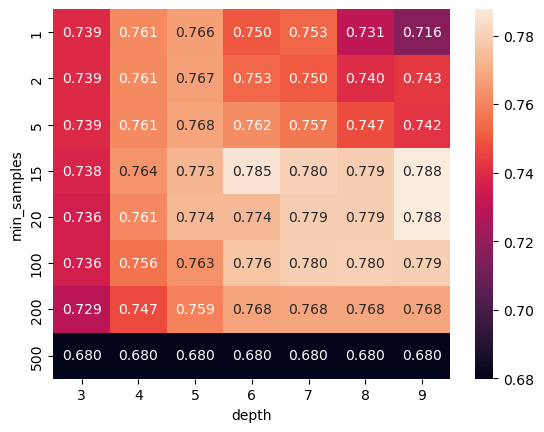

In [129]:
sns.heatmap(scores_pivoted, annot=True, fmt=".3f")

This can be suboptimal, but the best way is too find the best parameter for max_depth then based on that neighorhood of parameters choose others like min_samples.

## 6.6 Ensembles and random forest

Random forests are where we put a bunch of decision trees together. Based on the concensus of the models, a decision is made. 

In random forest each tree gets different random features and different number of features. This prevents one from creating duplicate trees. For example, a dataset with three features can have three different potential decision trees. This is accomplished by leaving out of of the features in each tree.

<img src="06-images/Screenshot 2025-11-09 at 2.53.07 PM.png">

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [132]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [133]:
roc_auc_score(y_val, y_pred)

0.8068949650044804

### Parameters to improve random forests
- n_estimators: is the number of trees created for the consensus classification. n=10 makes 10 trees then takes their average
- max_parameters
- bootstrap
- 

In [134]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"auc for {n} n_estimators ", auc)

auc for 10 n_estimators  0.795624349131772
auc for 20 n_estimators  0.8033227579860018
auc for 30 n_estimators  0.8098314402654332
auc for 40 n_estimators  0.8105125814342109
auc for 50 n_estimators  0.8121745658860285
auc for 60 n_estimators  0.8165823060715409
auc for 70 n_estimators  0.8201726768545203
auc for 80 n_estimators  0.8230576881160542
auc for 90 n_estimators  0.8203240415586931
auc for 100 n_estimators  0.8199274660337604
auc for 110 n_estimators  0.8220253808335956
auc for 120 n_estimators  0.8194400716863239
auc for 130 n_estimators  0.8168880627739701
auc for 140 n_estimators  0.8182321813470246
auc for 150 n_estimators  0.8158133733743431
auc for 160 n_estimators  0.8209809643748033
auc for 170 n_estimators  0.8210808650795574
auc for 180 n_estimators  0.8215864231914946
auc for 190 n_estimators  0.8176812138238356
auc for 200 n_estimators  0.8214259766050713


In [135]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"auc for {n} n_estimators and {d} max_depth", auc)
        scores.append((d, n, auc))

df_scores = pd.DataFrame(scores, columns = ['depth', 'n_estimators', 'auc'])     

auc for 10 n_estimators and 5 max_depth 0.7869662880530867
auc for 20 n_estimators and 5 max_depth 0.7998988883776126
auc for 30 n_estimators and 5 max_depth 0.807158339589741
auc for 40 n_estimators and 5 max_depth 0.8043157104453754
auc for 50 n_estimators and 5 max_depth 0.8066194812428858
auc for 60 n_estimators and 5 max_depth 0.8109242934295608
auc for 70 n_estimators and 5 max_depth 0.8043671744447943
auc for 80 n_estimators and 5 max_depth 0.8067526821825579
auc for 90 n_estimators and 5 max_depth 0.8043974473856288
auc for 100 n_estimators and 5 max_depth 0.8057900026640188
auc for 110 n_estimators and 5 max_depth 0.8047062313821415
auc for 120 n_estimators and 5 max_depth 0.8054448911385048
auc for 130 n_estimators and 5 max_depth 0.8099979414400232
auc for 140 n_estimators and 5 max_depth 0.8070251386500691
auc for 150 n_estimators and 5 max_depth 0.8107063282555521
auc for 160 n_estimators and 5 max_depth 0.8065952628902181
auc for 170 n_estimators and 5 max_depth 0.8074005

In [136]:
rf_scores_pivot = df_scores.pivot_table(index='n_estimators', columns=['depth'], values='auc')
rf_scores_pivot.head()

depth,5,10,15
n_estimators,,,
10,0.786966,0.811033,0.805354
20,0.799899,0.811272,0.808393
30,0.807158,0.817312,0.809111
40,0.804316,0.819261,0.816443
50,0.806619,0.822470,0.807555


<Axes: xlabel='depth', ylabel='n_estimators'>

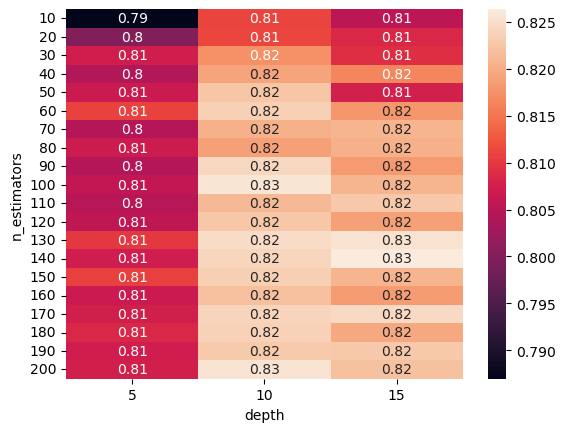

In [137]:
sns.heatmap(rf_scores_pivot, annot=True)

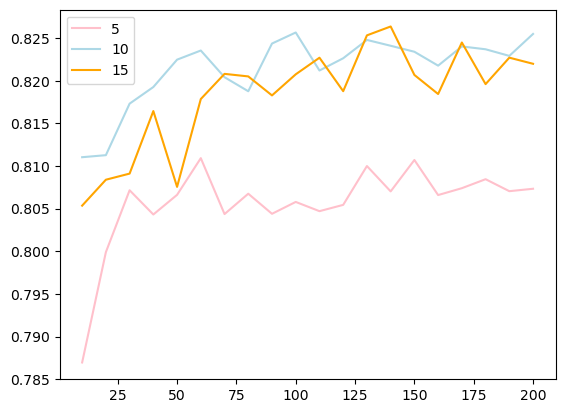

In [138]:
for d, c in zip([5, 10, 15], ['pink', 'lightblue', 'orange']):
    df_subset = df_scores[df_scores['depth'] == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, c=c, label=d)
    plt.legend()

## Boosting and Xgboost

Boosting is procedural where we train one model, look at the errors produced from that model, then fix those errors in the next model. This allows for the model to overtime increase performance. This is done for many iterations.

<img src="06-images/Screenshot 2025-11-09 at 4.08.23 PM.png">

Be aware that xgboost is very prone to overfitting the data of the model. So need to be careful.

In [139]:
import xgboost as xgb

In [140]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [141]:
# need to wrap out data into a special data structure unique to xgboost called a DMatrix
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, y_val, feature_names=features)

In [142]:
# need to define essential xg_boost parameters
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed':1,
    'verbosity':2
}

In [143]:
# immediately after training a new model xgboost can be evaluated on the validation data
watchlist = [(dtrain, 'train'), (dval, 'validation')]

In [144]:
# there is no easy way to capture the training data progress so we can use jupyter functions to capture stout's output
evals_result = {}

model = xgb.train(params=xgb_params,  # params defined above
                  dtrain=dtrain, 
                  num_boost_round=200, # total number of iterations
                  verbose_eval=10, # prints the progress of training every 10 training rounds
                  evals=watchlist, # monitor the metric for training and validation
                  evals_result = evals_result)

[0]	train-auc:0.86653	validation-auc:0.77999
[10]	train-auc:0.95512	validation-auc:0.81115
[20]	train-auc:0.97648	validation-auc:0.81877
[30]	train-auc:0.98844	validation-auc:0.81613
[40]	train-auc:0.99393	validation-auc:0.81407
[50]	train-auc:0.99723	validation-auc:0.81276
[60]	train-auc:0.99861	validation-auc:0.81244
[70]	train-auc:0.99962	validation-auc:0.81243
[80]	train-auc:0.99989	validation-auc:0.81359
[90]	train-auc:0.99998	validation-auc:0.81038
[100]	train-auc:0.99999	validation-auc:0.80842
[110]	train-auc:1.00000	validation-auc:0.80764
[120]	train-auc:1.00000	validation-auc:0.80750
[130]	train-auc:1.00000	validation-auc:0.80496
[140]	train-auc:1.00000	validation-auc:0.80379
[150]	train-auc:1.00000	validation-auc:0.80561
[160]	train-auc:1.00000	validation-auc:0.80604
[170]	train-auc:1.00000	validation-auc:0.80650
[180]	train-auc:1.00000	validation-auc:0.80567
[190]	train-auc:1.00000	validation-auc:0.80619
[199]	train-auc:1.00000	validation-auc:0.80602


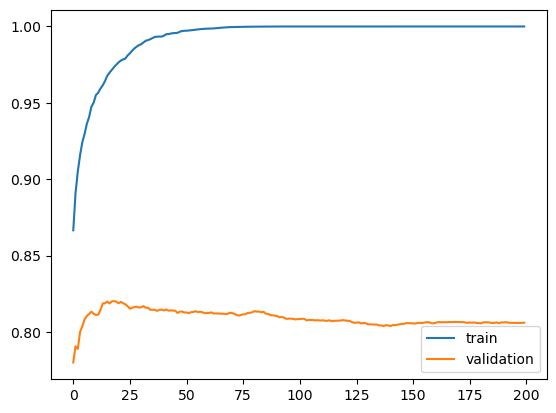

In [145]:
# Plot the learning curves
import matplotlib.pyplot as plt
plt.plot(evals_result['train']['auc'], label='train')
plt.plot(evals_result['validation']['auc'], label='validation')
plt.legend()
plt.show()

In [146]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8060200770143614

## XGBoost Parameter Tuning

A good practice is to tune parameters in this order.

Tuning the primary parameters:
- eta: the size of steps for the learning rate
- max_depth:
- min_child_weight:


Other important parameters:
- subsample: this involves randomly selecting some percentage of the training data. It is similar to randomforest, but instead of providing random features to the model, it gives it random samples.
- colsample_bytree
- lambda
- alpha


### Tuning ETA

In [147]:

# need to define essential xg_boost parameters
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed':1,
    'verbosity':2
}

In [149]:
eta_scores = {}
etas = [0.01, 0.05, 0.1, 0.3, 0.8, 1.0]

for eta in etas:

    # modify the eta parameter
    xgb_params = {
    'eta':eta,
    'max_depth':6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric':'auc',
    'nthread': 8,
    'seed':1,
    'verbosity':2,
    }

    # create a key for the eta_scores
    eta_key = f"eta={eta}"

    # create a dictionary to store the output of the model
    evals_result = {}

    model = xgb.train(params=xgb_params,  # params defined above
                    dtrain=dtrain, 
                    num_boost_round=200, # total number of iterations
                    verbose_eval=10, # prints the progress of training every 10 training rounds
                    evals=watchlist, # monitor the metric for training and validation
                    evals_result = evals_result)

    # store the resutl eta_scores
    eta_scores[eta_key] = evals_result

[0]	train-auc:0.86653	validation-auc:0.77999
[10]	train-auc:0.87211	validation-auc:0.77828
[20]	train-auc:0.87621	validation-auc:0.78749
[30]	train-auc:0.89308	validation-auc:0.79968
[40]	train-auc:0.89874	validation-auc:0.79885
[50]	train-auc:0.90250	validation-auc:0.79744
[60]	train-auc:0.90575	validation-auc:0.79740
[70]	train-auc:0.90822	validation-auc:0.79735
[80]	train-auc:0.91112	validation-auc:0.79994
[90]	train-auc:0.91380	validation-auc:0.80325
[100]	train-auc:0.91656	validation-auc:0.80454
[110]	train-auc:0.91933	validation-auc:0.80517
[120]	train-auc:0.92177	validation-auc:0.80551
[130]	train-auc:0.92433	validation-auc:0.80666
[140]	train-auc:0.92664	validation-auc:0.80752
[150]	train-auc:0.92900	validation-auc:0.80948
[160]	train-auc:0.93089	validation-auc:0.81098
[170]	train-auc:0.93311	validation-auc:0.81187
[180]	train-auc:0.93539	validation-auc:0.81290
[190]	train-auc:0.93764	validation-auc:0.81431
[199]	train-auc:0.93932	validation-auc:0.81484
[0]	train-auc:0.86653	va

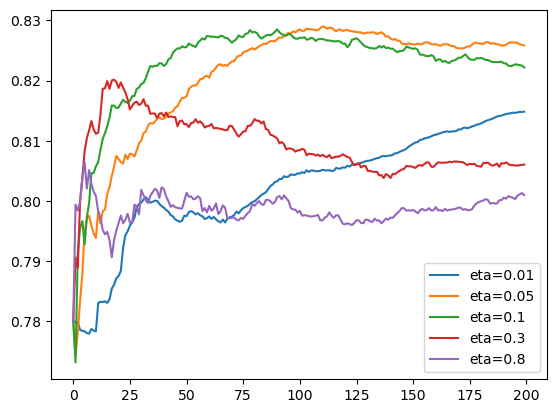

In [150]:
# graph the performance of each run
for eta in [0.01, 0.05, 0.1, 0.3, 0.8]:
    eta_key = f"eta={eta}"
    plt.plot(eta_scores[eta_key]['validation']['auc'], label=eta_key)
    plt.legend()

Here we see that having too low of a training rate results in a model that is taking to long to train. The auc is increasing, but it will require a substantial number of iterations and performance will not increase that much.

A learning rate of 0.05 and 0.1 seem to be the optimal learning rate with each having nearly identical performance. Probably would be best to opt for 0.1 is this case as training will take less time.

A learning rate of 0.3 and greater is too large leading to the model not correcting its errors well and overshooting leading to lower auc.

__Usually best optimize eta before moving onto other parameters in xgboost model.__

### Tuning the max_depth parameter

We have chosen an eta of 0.1. We know tune max_depth parameter.

Also define some functions for tuning parameters

In [151]:
# default xgb params
xgb_params = {
'eta':0.1,
'max_depth':6,
'min_child_weight':1,
'objective': 'binary:logistic',
'eval_metric':'auc',
'nthread': 8,
'seed':1,
'verbosity':2,
}

In [152]:
def tune_param(param_name: str, param_thresholds: list, xgb_params: dict):

    scores = {}
    thresholds = param_thresholds

    for thres in thresholds:

        # update the xgb_params
        xgb_params[param_name] = thres

        # create a key for the eta_scores
        param_key = f"{param_name}={thres}"

        # create a dictionary to store the output of the model
        evals_result = {}

        model = xgb.train(params=xgb_params,  # params defined above
                        dtrain=dtrain, 
                        num_boost_round=200, # total number of iterations
                        verbose_eval=10, # prints the progress of training every 10 training rounds
                        evals=watchlist, # monitor the metric for training and validation
                        evals_result = evals_result)

        # store the resutl eta_scores
        scores[param_key] = evals_result

    return scores

In [153]:
# potential bug is if you provide a threshold that was not used for training
def plot_param_metric(param_name: str, param_thresholds: list, evals_result: dict):
    for thres in param_thresholds:
        param_key = f"{param_name}={thres}"
        plt.plot(evals_result[param_key]['validation']['auc'], label=param_key)
        plt.legend()

In [154]:
def update_xgb_params(param_name: str, update_value: float, xgb_params):
    # update the xgb_params
    xgb_params[param_name] = update_value

    return xgb_params

In [155]:
depth_scores = tune_param(param_name='max_depth', param_thresholds=[3, 4, 6, 10, 15, 20], xgb_params=xgb_params)

[0]	train-auc:0.77610	validation-auc:0.73891
[10]	train-auc:0.85036	validation-auc:0.79448
[20]	train-auc:0.86898	validation-auc:0.80852
[30]	train-auc:0.88186	validation-auc:0.81747
[40]	train-auc:0.88961	validation-auc:0.82042
[50]	train-auc:0.89673	validation-auc:0.82755
[60]	train-auc:0.90252	validation-auc:0.82725
[70]	train-auc:0.90859	validation-auc:0.82809
[80]	train-auc:0.91216	validation-auc:0.82920
[90]	train-auc:0.91623	validation-auc:0.83121
[100]	train-auc:0.91922	validation-auc:0.83093
[110]	train-auc:0.92290	validation-auc:0.83152
[120]	train-auc:0.92517	validation-auc:0.83134
[130]	train-auc:0.92785	validation-auc:0.83193
[140]	train-auc:0.92981	validation-auc:0.83304
[150]	train-auc:0.93222	validation-auc:0.83358
[160]	train-auc:0.93392	validation-auc:0.83406
[170]	train-auc:0.93624	validation-auc:0.83350
[180]	train-auc:0.93804	validation-auc:0.83380
[190]	train-auc:0.94029	validation-auc:0.83338
[199]	train-auc:0.94186	validation-auc:0.83235
[0]	train-auc:0.81665	va

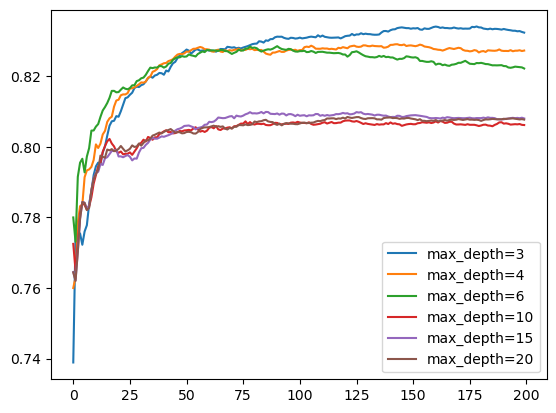

In [156]:
plot_param_metric(param_name='max_depth', param_thresholds=[3, 4, 6, 10, 15, 20], evals_result=depth_scores)

Based on this we see that increasing depth (creating more layers) eventually leads to worse model performance on the validation data. This is most likely due to the model overfitting the data.

Depth of 3, 4, 6 see significant outperformance of models with more depth. Based on these results we will choose a depth of 3. This means we update out model to have a `eta=0.1 and max_depth=3`

In [157]:
new_params = update_xgb_params(param_name='max_depth', update_value=3, xgb_params=xgb_params)

In [158]:
min_child_weight_scores = tune_param(param_name='min_child_weight', param_thresholds=[1, 10, 30, 50, 80, 100, 150], xgb_params=xgb_params)

[0]	train-auc:0.77610	validation-auc:0.73891
[10]	train-auc:0.85036	validation-auc:0.79448
[20]	train-auc:0.86898	validation-auc:0.80852
[30]	train-auc:0.88186	validation-auc:0.81747
[40]	train-auc:0.88961	validation-auc:0.82042
[50]	train-auc:0.89673	validation-auc:0.82755
[60]	train-auc:0.90252	validation-auc:0.82725
[70]	train-auc:0.90859	validation-auc:0.82809
[80]	train-auc:0.91216	validation-auc:0.82920
[90]	train-auc:0.91623	validation-auc:0.83121
[100]	train-auc:0.91922	validation-auc:0.83093
[110]	train-auc:0.92290	validation-auc:0.83152
[120]	train-auc:0.92517	validation-auc:0.83134
[130]	train-auc:0.92785	validation-auc:0.83193
[140]	train-auc:0.92981	validation-auc:0.83304
[150]	train-auc:0.93222	validation-auc:0.83358
[160]	train-auc:0.93392	validation-auc:0.83406
[170]	train-auc:0.93624	validation-auc:0.83350
[180]	train-auc:0.93804	validation-auc:0.83380
[190]	train-auc:0.94029	validation-auc:0.83338
[199]	train-auc:0.94186	validation-auc:0.83235
[0]	train-auc:0.77424	va

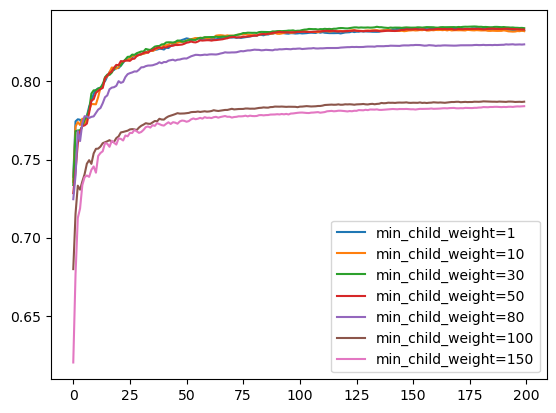

In [159]:
plot_param_metric(param_name='min_child_weight', param_thresholds=[1, 10, 30, 50, 80, 100, 150], evals_result=min_child_weight_scores)

Based on this result it appears that having fewer samples in a leaf leads to better performance. While eventually increasing the number of samples in a leaf leads to a decrease in performance. This is likely due to the tree being upable to adequately correct errors due to the large number of samples required in each leaf.

Let's zoom in the on the top performers which where leafs that could have between 1 and 30 samples.

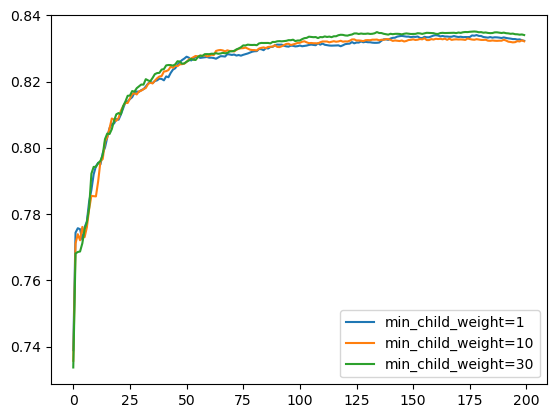

In [160]:
plot_param_metric(param_name='min_child_weight', param_thresholds=[1, 10, 30], evals_result=min_child_weight_scores)

It appears that 30 is the optimal leaf size. Most likely having a leaf with a single child could lead to overfitting decreasing validation auc. 30 is small enough to allow the model to correct errors while also having a large enough samples for the model to generalize and not overfit.

The optimal parameters are: 
`eta=0.1 and max_depth=3, min_child_weight=30, iterations=175`

In [161]:
final_params = update_xgb_params(param_name='min_child_weight', update_value=30, xgb_params=xgb_params)

In [162]:
# this is the final xgboost model
model = xgb.train(xgb_params, dtrain, num_boost_round=175,
                  verbose_eval=5,
                  evals=watchlist)

[0]	train-auc:0.76455	validation-auc:0.73369
[5]	train-auc:0.82726	validation-auc:0.77541
[10]	train-auc:0.84502	validation-auc:0.79427
[15]	train-auc:0.85474	validation-auc:0.80435
[20]	train-auc:0.86152	validation-auc:0.81053
[25]	train-auc:0.86732	validation-auc:0.81581
[30]	train-auc:0.87184	validation-auc:0.81915
[35]	train-auc:0.87493	validation-auc:0.82114
[40]	train-auc:0.87793	validation-auc:0.82381
[45]	train-auc:0.87926	validation-auc:0.82523
[50]	train-auc:0.88136	validation-auc:0.82604
[55]	train-auc:0.88327	validation-auc:0.82745
[60]	train-auc:0.88405	validation-auc:0.82832
[65]	train-auc:0.88528	validation-auc:0.82852
[70]	train-auc:0.88617	validation-auc:0.82918
[75]	train-auc:0.88748	validation-auc:0.83097
[80]	train-auc:0.88868	validation-auc:0.83113
[85]	train-auc:0.88976	validation-auc:0.83171
[90]	train-auc:0.89066	validation-auc:0.83221
[95]	train-auc:0.89119	validation-auc:0.83255
[100]	train-auc:0.89206	validation-auc:0.83245
[105]	train-auc:0.89291	validation-

## 6.9 Selecting the final model

In [163]:
# best decision tree model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [164]:
rf = RandomForestClassifier(max_depth=10, 
                            n_estimators=140, 
                            min_samples_leaf=3,
                            random_state=1)

rf.fit(X_train, y_train)

,n_estimators,140
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [165]:
print(final_params, "\n")

model = xgb.train(final_params, dtrain, num_boost_round=175)

{'eta': 0.1, 'max_depth': 3, 'min_child_weight': 30, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 8, 'seed': 1, 'verbosity': 2} 



In [166]:
# auc for decision tree
y_pred_dt = dt.predict_proba(X_val)[:, 1]
dt_auc = roc_auc_score(y_true=y_val, y_score=y_pred_dt)

# auc for random forest
y_pred_rf = rf.predict_proba(X_val)[:, 1]
rf_auc = roc_auc_score(y_true=y_val, y_score=y_pred_rf)

# auc for xgboost
y_pred_xgb = model.predict(dval)
xgb_auc = roc_auc_score(y_val, y_pred_xgb)


print("The roc_auc score across different models...")
print("Decision Tree auc", dt_auc)
print("Random Forest auc", rf_auc)
print("XGBoost auc", xgb_auc)


The roc_auc score across different models...
Decision Tree auc 0.7853194400716863
Random Forest auc 0.8249103920951297
XGBoost auc 0.8349852268048726


### Best model selected; we now want to use full training dataset for training

In [167]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.status == 'default').astype(int).values
del df_full_train['status']

In [168]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [171]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=list(dv.get_feature_names_out()))

dtest = xgb.DMatrix(X_test, feature_names=list(dv.get_feature_names_out()))

In [172]:
# optimized xgb params
print(final_params)

{'eta': 0.1, 'max_depth': 3, 'min_child_weight': 30, 'objective': 'binary:logistic', 'eval_metric': 'auc', 'nthread': 8, 'seed': 1, 'verbosity': 2}


In [173]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8218195591613314